# 実践コンピュータビジョン
# 2章 画像の局所記述子
## 2.3 ジオタグ付きの画像を対応づける
### モジュールのimport

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline

### urllibモジュールのimport
テキストではurllib, urlparseモジュールを使用しているが、Python 3.xでurllibの仕様が変わった。  
ここでは3.xのurllibモジュールを使用する。

参考: Python Documentation  
https://docs.python.org/3/library/urllib.request.html#module-urllib.request

In [3]:
# import urllib, urlparse
import urllib
from urllib.parse import urlparse
import os
import json

### Panoramioの画像を読み込む
Googleの画像サービスPanoramioから、ホワイトハウス近辺で撮影された画像を読み込む。  
緯度と経度を指定して、周辺で撮影された２０枚の画像のURLを取り込む。

In [7]:
# 画像を問い合わせる
url = 'http://www.panoramio.com/map/get_panoramas.php?order=popularity&\
set=public&from=0&to=20&minx=-77.037564&miny=38.896662&\
maxx=-77.035564&maxy=38.898662&size=medium'

In [9]:
#　3.xからurllib.request.urlopen()を使う。
# c = urllib.urlopen(url)
c = urllib.request.urlopen(url)

In [10]:
# JSONから各画像のURLを取り出す
# 3.xではread()の内容はバイナリ形式であるため、decode()する必要がある
# j = json.loads(c.read())
j = json.loads(c.read().decode())
imurls = []
for im in j['photos']:
    imurls.append(im['photo_file_url'])

In [11]:
# 画像をダウンロードする
for url in imurls:
    image = urllib.request.URLopener()
#     image.retrieve(url, 'panoramio/' + os.path.basename(urlparse.urlparse(url).path))
    image.retrieve(url, 'panoramio/' + os.path.basename(urlparse(url).path))
    print('downloading:', url)

downloading: http://mw2.google.com/mw-panoramio/photos/medium/43112658.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/105646809.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/588922.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/17651545.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/17651671.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/13512111.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/5752686.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/42748461.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/18739253.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/15646255.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/29206502.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/17651715.jpg
downloading: http://mw2.google.com/mw-panoramio/photos/medium/3725907.jpg
downloading: http://mw2.goog

### 画像リストの作成とSIFT特徴量の計算
Panoramioからダウンロードした画像のファイル名のリストを作成し、SIFT特徴量を計算する。

In [12]:
import sift
import imtools

imlist = imtools.get_imlist('panoramio')
nbr_images = len(imlist)
nbr_images

20

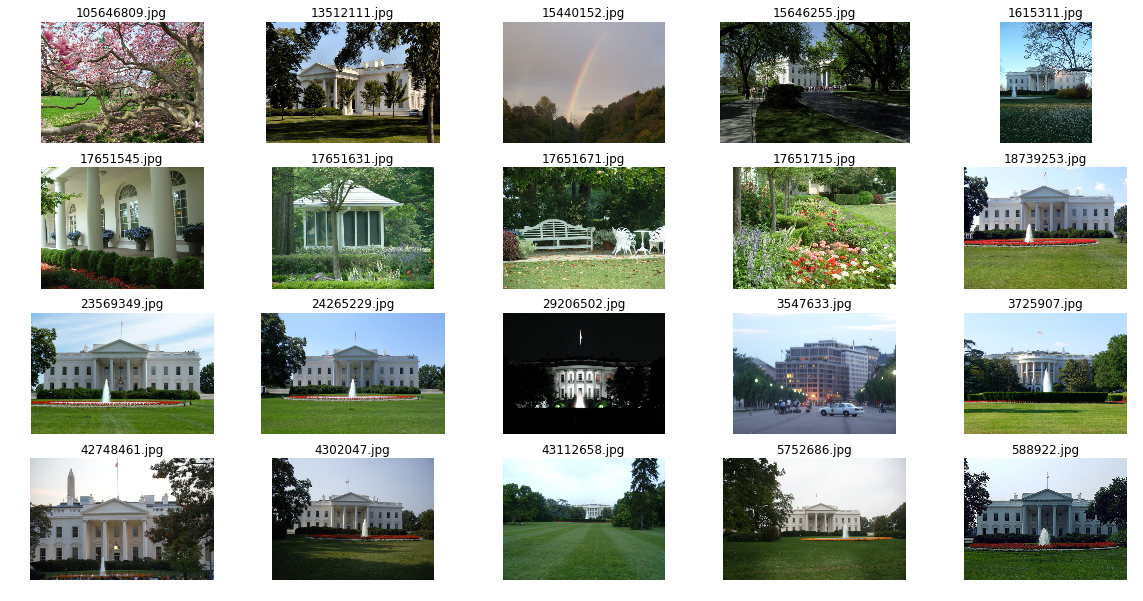

In [13]:
# 20個の画像を表示する
plt.figure(figsize=(20,10))
for i, im in enumerate(imlist):
    plt.subplot(4, 5, i+1)
    plt.imshow(Image.open(im))
    plt.title(im.split('/')[-1])
    plt.axis('off')

In [14]:
# リスト内のすべての画像についてSIFT特徴量を計算する
featlist = []
for imname in imlist:
    sname = imname[:-3]+'sift'
    sift.process_image(imname,sname)
    featlist.append(sname)

processed tmp.pgm to panoramio/105646809.sift
processed tmp.pgm to panoramio/13512111.sift
processed tmp.pgm to panoramio/15440152.sift
processed tmp.pgm to panoramio/15646255.sift
processed tmp.pgm to panoramio/1615311.sift
processed tmp.pgm to panoramio/17651545.sift
processed tmp.pgm to panoramio/17651631.sift
processed tmp.pgm to panoramio/17651671.sift
processed tmp.pgm to panoramio/17651715.sift
processed tmp.pgm to panoramio/18739253.sift
processed tmp.pgm to panoramio/23569349.sift
processed tmp.pgm to panoramio/24265229.sift
processed tmp.pgm to panoramio/29206502.sift
processed tmp.pgm to panoramio/3547633.sift
processed tmp.pgm to panoramio/3725907.sift
processed tmp.pgm to panoramio/42748461.sift
processed tmp.pgm to panoramio/4302047.sift
processed tmp.pgm to panoramio/43112658.sift
processed tmp.pgm to panoramio/5752686.sift
processed tmp.pgm to panoramio/588922.sift


### SIFT特徴量のスコアを算出する
画像ごとのSIFT特徴量を比較して、合致のスコアを評価する。

In [15]:
matchscores = np.zeros((nbr_images,nbr_images))

for i in range(nbr_images):
    for j in range(i,nbr_images): # 上三角成分だけを計算する
        print('comparing ', imlist[i], imlist[j])

        l1,d1 = sift.read_features_from_file(featlist[i])
        l2,d2 = sift.read_features_from_file(featlist[j])

        matches = sift.match_twosided(d1,d2)

        nbr_matches = np.sum(matches > 0)
        print('number of matches = ', nbr_matches)
        matchscores[i,j] = nbr_matches 

comparing  panoramio/105646809.jpg panoramio/105646809.jpg
number of matches =  3144
comparing  panoramio/105646809.jpg panoramio/13512111.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/15440152.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/15646255.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/1615311.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/17651545.jpg
number of matches =  1
comparing  panoramio/105646809.jpg panoramio/17651631.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/17651671.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/17651715.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/18739253.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/23569349.jpg
number of matches =  0
comparing  panoramio/105646809.jpg panoramio/24265229.jpg
number of matches =  0
comparing  panoramio/1056

In [16]:
# 値をコピーしてマトリクスを作る
for i in range(nbr_images): 
    for j in range(i+1,nbr_images): # 対角成分はコピー不要
        matchscores[j,i] = matchscores[i,j]

In [17]:
# スコアを表示する
print(matchscores)

[[  3.14400000e+03   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   1.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.66200000e+03   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   1.20000000e+02   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00

In [18]:
# デフォルトのprint文では見にくいので、pandas.DataFrameで読む。
import pandas as pd
df = pd.DataFrame(matchscores)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3144,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1662,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,120,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,1161,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,1,1481,0,0,0,0,0,2,0,1,1,0,0,0,0,2,3
5,1,0,0,0,0,806,1,0,0,0,1,0,1,0,0,1,0,0,0,0
6,0,0,0,1,0,1,1677,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,1,0,0,0,0,0,1396,13,0,1,0,0,0,0,1,1,0,0,0
8,0,0,0,0,0,0,0,13,2701,0,1,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,686,27,20,0,0,0,2,5,0,2,4


### 結果
imlistの9〜11が類似していることがわかる。該当する画像は以下のとおり。

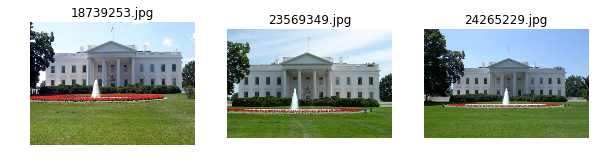

In [19]:
plt.figure(figsize=(10,10))
for i, im in enumerate(imlist[9:12]):
    plt.subplot(1, 3, i+1)
    plt.imshow(Image.open(im))
    plt.title(im.split('/')[-1])
    plt.axis('off')

In [20]:
import pickle
with open('panoramio_matchscores.pkl','wb') as f:
    pickle.dump(nbr_images,f)
    pickle.dump(imlist,f)
    pickle.dump(matchscores,f)

### 2.3.3 関連画像を可視化する
テキストp.50

pydotでグラフを書く演習は省略